# Descriptor to control namespace instance

Descriptors give a handle on the instance namespace which can be of great use. Let's say we want to store computotionally expensive calulation data based on instance parameters which are set at instantiation and we want to clean them if parameters are changed. A descriptor can solve that problem.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class CleanNameSpace:

    def __init__(self, *paramters_to_clean):
        self.parameters = paramters_to_clean
    
    def __set_name__(self, owner, name):
        self.name = name
    
    def __get__(self, instance, owner):
        if instance is None:
            return self
        return instance.__dict__[self.name]

    def __set__(self, instance, value):
        instance.__dict__[self.name] = value
        self.check_parameter_count(instance)

    def check_parameter_count(self, instance):
        """ check parameter count and reset attribute when count > 1 """
        
        if not hasattr(instance, f"counter_{self.name}"):
            instance.__dict__[f"counter_{self.name}"] = 1

        if instance.__dict__[f"counter_{self.name}"] > 1:
            for param in self.parameters:
                instance.__dict__[param] = np.array([])
            print(f"Parameter {self.name!r} have been changed, hence, {self.parameters} have been reset.")
        
        instance.__dict__[f"counter_{self.name}"] += 1

In [3]:
class Analyzer:

    n = CleanNameSpace('_theta_distribution', '_r_distribution')
    mu_r = CleanNameSpace('_theta_distribution', '_r_distribution')
    sigma_r = CleanNameSpace('_theta_distribution', '_r_distribution')
    
    def __init__(self, n, mu_r, sigma_r):
        self.n = n
        self.mu_r = mu_r
        self.sigma_r = sigma_r

        # computationnaly expensive data 
        self._theta_distribution = np.array([])
        self._r_distribution = np.array([])

    @property
    def distribution(self):
        if self._theta_distribution.shape[0] == 0 or self._r_distribution.shape[0] == 0:
            self._r_distribution = np.random.normal(self.mu_r, self.sigma_r, self.n)
            self._theta_distribution = np.random.normal(0, 2*np.pi, self.n)
            print("... COMPUTE DATA ...")
        else:
            print("... ACCESSING DATA ...")
            
        return self._r_distribution, self._theta_distribution

    def plot(self):
        r, theta = self.distribution
        plt.figure(figsize=(4,4))
        plt.scatter(r*np.cos(theta), r*np.sin(theta))
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title("Mass distribution");

    def __repr__(self):
        cls_name = type(self).__name__
        return f"{cls_name}(n={self.n}, mu_r={self.mu_r}, sigma_r={self.sigma_r})"

### Example

In [4]:
a = Analyzer(1500, 10, 0.2)
a

Analyzer(n=1500, mu_r=10, sigma_r=0.2)

In [5]:
a.distribution

... COMPUTE DATA ...


(array([10.10559751,  9.75782503, 10.31785804, ..., 10.17931329,
        10.17169492,  9.70445936]),
 array([ 5.70473513, -4.49296527,  0.1220749 , ..., -3.13788399,
         1.28498809,  5.48480896]))

In [6]:
# on the second call data are stored hence can be accessed straghtway without any calculations

In [7]:
a.distribution

... ACCESSING DATA ...


(array([10.10559751,  9.75782503, 10.31785804, ..., 10.17931329,
        10.17169492,  9.70445936]),
 array([ 5.70473513, -4.49296527,  0.1220749 , ..., -3.13788399,
         1.28498809,  5.48480896]))

In [8]:
a.n = 20

Parameter 'n' have been changed, hence, ('_theta_distribution', '_r_distribution') have been reset.


In [9]:
a.distribution

... COMPUTE DATA ...


(array([ 9.910249  ,  9.70443132, 10.28431057,  9.74410424,  9.74320361,
        10.04057917, 10.11129091, 10.42266131,  9.99927211, 10.2991532 ,
        10.13949372,  9.89346301, 10.21312145, 10.0004132 , 10.22278383,
        10.5142099 , 10.05396083,  9.9985117 ,  9.68569831,  9.91831024]),
 array([-9.99024474e-01,  4.54837047e+00, -2.42506792e+00,  5.00758883e+00,
        -6.95589873e+00,  4.51524599e+00,  4.04673464e+00, -3.73529448e+00,
        -7.67063067e-01,  4.34269506e+00, -5.05294722e+00,  7.99220651e-01,
        -6.98884351e+00, -1.27942669e+01,  3.06975048e+00, -1.99993019e+00,
        -2.23724913e+00,  1.08428687e-02,  2.93658159e+00, -1.93269166e+00]))

Parameter 'n' have been changed, hence, ('_theta_distribution', '_r_distribution') have been reset.
Parameter 'mu_r' have been changed, hence, ('_theta_distribution', '_r_distribution') have been reset.
Parameter 'sigma_r' have been changed, hence, ('_theta_distribution', '_r_distribution') have been reset.
... COMPUTE DATA ...


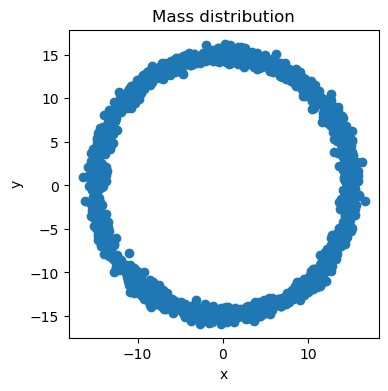

In [10]:
a.n=1500
a.mu_r=15
a.sigma_r=0.5
a.plot()